# Predict car mileage

###### The mission is to predict the mileage of a particular car in city driving, given data of some parameters (features) for hundreds of cars.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


We see that horsepower column is perceived as object data type by Pandas, whereas we should be expecting a floating value. It means there is a string somewhere. Now our goal is to find that string values(s) and deduce what to do with the corrupt data.

the follow steps below to clean the corrupt data for horsepower column

In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
df.corr()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8760\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


### Removing Missing Values

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
# Convert '?' to NaN and then handle missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [11]:
# Assume 'car_name' is the column containing car names
# Drop the non-numeric column before scaling
numeric_columns = df.select_dtypes(include=['number'])
X = numeric_columns.values

### Data Visualization

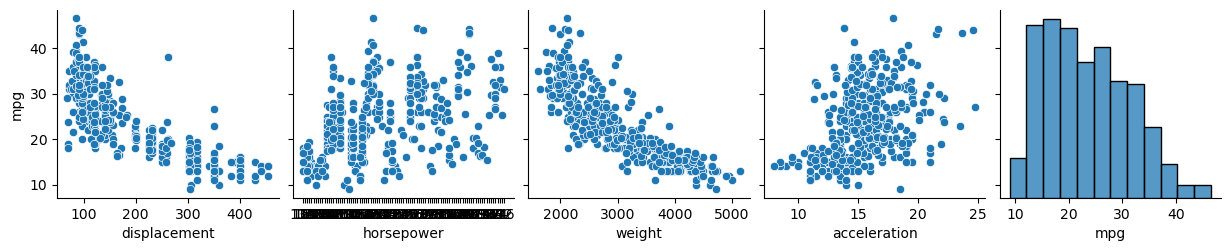

In [12]:
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

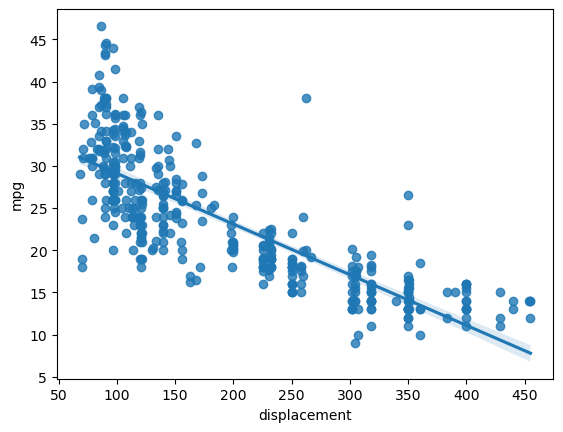

In [13]:
sns.regplot(x='displacement',y='mpg',data=df);

### Define Target Variable y and Feature X

In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [15]:
y=df['mpg']

In [16]:
y.shape

(392,)

In [17]:
X=df[['displacement','horsepower','weight','acceleration']]

In [18]:
X.shape

(392, 4)

In [19]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130,3504,12.0
1,350.0,165,3693,11.5
2,318.0,150,3436,11.0
3,304.0,150,3433,12.0
4,302.0,140,3449,10.5
...,...,...,...,...
393,140.0,86,2790,15.6
394,97.0,52,2130,24.6
395,135.0,84,2295,11.6
396,120.0,79,2625,18.6


### Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X= ss.fit_transform(X)
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [21]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


After Standardization Mean is Zero and Standard Deviation is One

### Train and Test Split Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2529)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 4), (275, 4), (117,), (275,))

### Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
lr.intercept_

23.601118059983822

In [29]:
lr.coef_

array([-1.07085922, -0.64133484, -5.18021642,  0.26756035])

##### Mileage = 23.4 -1.07 Displacement - 0.64 Horesepower - 5.18 Weight - 0.26 Acceleration + error

### Predict Test Data

In [30]:
y_pred = lr.predict(X_test)

In [31]:
y_pred

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

### Model Accuracy

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [33]:
mean_absolute_error(y_test,y_pred)

3.3564087099398776

In [34]:
mean_absolute_percentage_error(y_test,y_pred)

0.1497067196739959

In [35]:
r2_score(y_test,y_pred)

0.6923289624942408

### Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.transform(X_test)

In [37]:
lr.fit(X_train2, y_train)

LinearRegression()

In [38]:
lr.intercept_

21.555339016047157

In [39]:
lr.coef_

array([-2.2748814 , -3.73899676, -2.6609481 ,  0.24305983,  2.0800206 ,
       -0.80160787, -3.04666232,  2.11059861,  1.49729576,  2.93749665])

In [40]:
y_pred_poly=lr.predict(X_test2)

### Model Accuracy

In [41]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [42]:
mean_absolute_error(y_test,y_pred_poly)

3.205494068743995

In [43]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.14706619052559178

In [44]:
r2_score(y_test,y_pred_poly)

0.6842004879324937